<h1><center>EARTH 468: HW01</center></h1>  

<h6>Submitted by: Prithvi Thakur</h6>
<h6>Email: prith@umich.edu</h6>

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

<h3>Problem 1: indri weight campaign</h3>

In [2]:
# Indri weight array (kg)
indri_weight = np.array([8.45, 6.43, 6.73, 6.02, 4.50, 2.39, 6.92\
                   , 3.29, 3.95, 13.22])

<h6>(a) Histogram of Indri weights</h6>

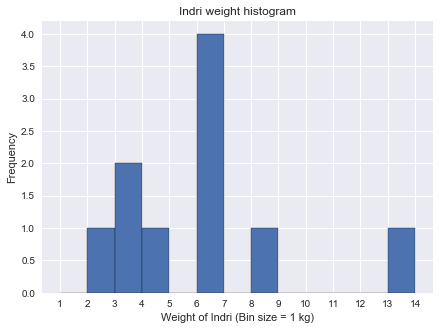

In [3]:
# Initialize a figure
fig = plt.figure(figsize=(7,5))

# Initialize subplots
ax = fig.add_subplot(111)

# Plot Histogram
ax.hist(indri_weight, bins = np.arange(1,15,1), align = 'mid', edgecolor = 'black')
ax.set_title("Indri weight histogram")
ax.set_xlabel("Weight of Indri (Bin size = 1 kg)")
ax.set_ylabel("Frequency")
ax.set_xticks(np.arange(1,15,1))

plt.show()

<h6>(b) Mean, sample standard deviation and standard error</h6>

In [4]:
# Mean
mu = np.mean(indri_weight)

# Standard error
sem = stats.sem(indri_weight)

# Standard deviation
std = np.std(indri_weight)

print("Mean Indri weight = %.3f" %mu)
print("Sample standard deviation = %.3f" %std)
print("Standard error is = %.3f" %sem)

Mean Indri weight = 6.190
Sample standard deviation = 2.935
Standard error is = 0.978


<b>(c) Sample standard deviation</b> represents the dispersion of each member of the sample from its sample mean. It does not vary systematically with sample size.


<b>The standard error</b> represents how far is the sample mean from the population mean. As the sample size increases, the standard error decreases so that the sample mean approaches the population mean.

<h6>(d) Confidence intervals of the determined mean</h6>

In [5]:
sem_68 = stats.norm.interval(0.683, loc = mu, scale = sem)
sem_95 = stats.norm.interval(0.954, loc = mu, scale = sem)
sem_99 = stats.norm.interval(0.997, loc = mu, scale = sem)

print("68.3 confidence interval of the mean = %.3f, %.3f kgs" %sem_68)
print("\n95.4 confidence interval of the mean = %.3f, %.3f kgs" %sem_95)
print("\n99.7 confidence interval of the mean = %.3f, %.3f kgs" %sem_99)

68.3 confidence interval of the mean = 5.211, 7.169 kgs

95.4 confidence interval of the mean = 4.238, 8.142 kgs

99.7 confidence interval of the mean = 3.286, 9.094 kgs


<h6>(e) Confidence interval of the weights</h6>

In [6]:
std_68 = stats.norm.interval(0.683, loc = mu, scale = std)
std_95 = stats.norm.interval(0.954, loc = mu, scale = std)
std_99 = stats.norm.interval(0.997, loc = mu, scale = std)

print("68.3 confidence interval of the weights = %.3f, %.3f kgs" %std_68)
print("\n95.4 confidence interval of the weights = %.3f, %.3f kgs" %std_95)
print("\n99.7 confidence interval of the weights = %.3f, %.3f kgs" %std_99)

68.3 confidence interval of the weights = 3.253, 9.127 kgs

95.4 confidence interval of the weights = 0.333, 12.047 kgs

99.7 confidence interval of the weights = -2.521, 14.901 kgs


<b>(f) The weights in part (e)</b> do not make sense as the 99.7 intrerval has negative weights, and 95.4 confidence interval has unrealistic Indri weights.   
  
The reason is that we have too few data and the histogram does not look like a normal distribution. The weight 13.22 is a clear outlier in the data set which skews our mean and standard deviation.

<h6>(g) Dixon's Q test</h6>

In [7]:
# Weights in ascending order
weights_asc = np.sort(indri_weight)
print(weights_asc)

Q_value = (13.22 - 8.45)/(13.22-2.39)
print("\nThe Q-value of the datum weight 13.22 is %.3f" %Q_value)

print("\nTherefore, we are 90% confident that the weight 13.22 is an outlier.")

[  2.39   3.29   3.95   4.5    6.02   6.43   6.73   6.92   8.45  13.22]

The Q-value of the datum weight 13.22 is 0.440

Therefore, we are 90% confident that the weight 13.22 is an outlier.


<h6>(h) Comparison with more data</h6>

The new student's standard error measurement is significantly lower suggesting that her sample mean is closer to the population mean. The distribution looks more like a normal distribution.  
  
Using part (d) of our analysis, we can see that even the 99.7% confidence interval doesn't include the Indri weights less than 3.2 kgs, whereas the new student's data contains data with Indri weights less than 2 kgs.
  
  
Since the new sample standard deviation is very low compared to our original dtandard deviation, the confidence of 13.22 kgs being an outlier <b>increases</b> significantly.

<h3>Problem 2: Huron river daily discharge</h3>

In [8]:
# Import data from csv
discharge_data = pd.read_csv("HuronRiverUSGS_2010-2015.csv", delimiter=',', \
                             encoding = 'utf-8-sig')
discharge = discharge_data["discharge (million m3/day)"]

<h6>(a) Mean, standard dev, median, and 90% range of discharge</h6>

In [19]:
mean_discharge = np.mean(discharge)
median_discharge = np.median(discharge)
std_discharge = np.std(discharge)
range90_discharge = stats.norm.interval(0.90, loc = mean_discharge, \
                                        scale = std_discharge)

print("Mean Discharge                  = %.3f Million m3/day" %mean_discharge)
print("Median Discharge                = %.3f Million m3/day" %median_discharge)
print("Standard deviation of Discharge = %.3f Million m3/day" %std_discharge)
print("90 percentile Discharge range   = %.3f to %.3f Million m3/day"\
      %range90_discharge)

Mean Discharge                  = 0.968 Million m3/day
Median Discharge                = 0.900 Million m3/day
Standard deviation of Discharge = 0.493 Million m3/day
90 percentile Discharge range   = 0.158 to 1.779 Million m3/day


<h6>(b) Error on the mean discharge</h6>

In [10]:
sem_discharge = stats.sem(discharge)

print("Standard error of mean discharge = %.3f" %sem_discharge)

Standard error of mean discharge = 0.011


<h6>(c) Histogram of discharge </h6>

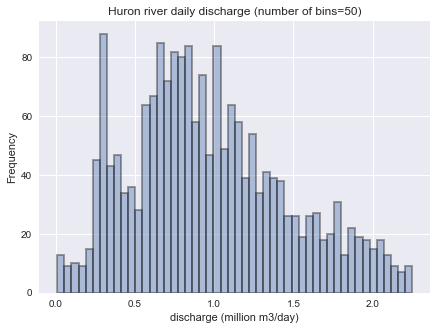

In [11]:
# Initialize figure
fig = plt.figure(figsize=(7,5))

# Initialize subplot 1
ax = fig.add_subplot(111)

disc = discharge.sort_values()

# Plot discharge histogram using seaborn
sns.distplot(disc, bins=50, hist_kws=dict(edgecolor="k",\
                                               linewidth=2), kde=False)
ax.set_ylabel('Frequency')
ax.set_title('Huron river daily discharge (number of bins=50)')

plt.show()

<h6>(d) Plot Gaussian pdf</h6>

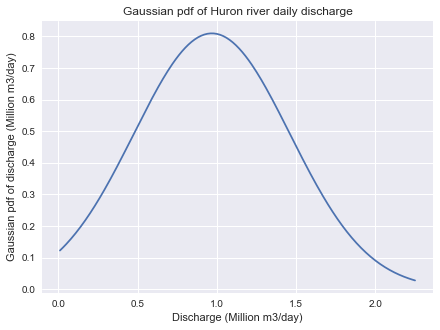

In [12]:
# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Gaussian pdf
x = discharge.sort_values()
y = stats.norm.pdf(x, mean_discharge, std_discharge)

ax.plot(x, y)
ax.set_xlabel("Discharge (Million m3/day)")
ax.set_ylabel("Gaussian pdf of discharge (Million m3/day)")
ax.set_title("Gaussian pdf of Huron river daily discharge")
plt.show()

The Gaussian pdf is comparable to the histogram in the previous part.  
  
Yes, a Gaussian pdf approximately desxribes the discharge of Huron river, as we can see from the similarity between the histogram and the pdf. Both the graphs have similar values for x and y axes, with y axis being normalized to 1 for the Gaussian pdf.  

<h6>(e) Normal probability plot</h6>

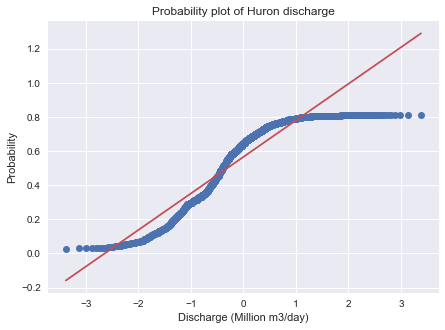

In [13]:
# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Gaussian pdf
y = stats.norm.pdf(x, mean_discharge, std_discharge)

stats.probplot(y, plot=plt)
ax.set_xlabel("Discharge (Million m3/day)")
ax.set_ylabel("Probability")
ax.set_title("Probability plot of Huron discharge")
plt.show()

No, the graph here tells us that the data does not follow a Gaussian pdf since it deviates significantly from a theoretical straight line.

<h6>(f) Histogram of log(discharge)</h6>

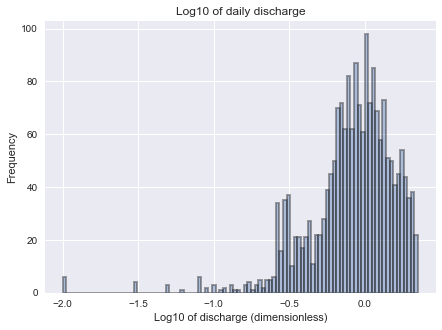

In [14]:
# log of daily discharge data
log_discharge = np.log10(discharge)

# Initialize figure
fig = plt.figure(figsize=(7,5))

# Initialize subplot 1
ax = fig.add_subplot(111)

sort = log_discharge.sort_values()

# Plot log10 discharge histogram
sns.distplot(sort, bins=100, hist_kws=dict(edgecolor="k",\
                                               linewidth=2), kde=False)
ax.set_ylabel('Frequency')
ax.set_xlabel('Log10 of discharge (dimensionless)')
ax.set_title('Log10 of daily discharge')

plt.show()

Yes, the value with its log of -2.0 can be considered as an outlier.

<h6>(g) Mean, std, range of log10(discharge)</h6>

In [20]:
# sort is the sorted log10 values
mean_log10 = np.mean(sort)
median_log10 = np.median(sort)
std_log10 = np.std(sort)
range90_log10 = stats.norm.interval(0.90, loc = mean_log10, scale = std_log10)

print("Mean log10 Discharge                  = %.3f" %mean_log10)
print("Median log10 Discharge                = %.3f" %median_log10)
print("Standard deviation of log10 Discharge = %.3f" %std_log10)
print("90 percentile log10 Discharge range   = %.3f to %.3f" %range90_log10)

# Compute antilog
print("\n\nAntilog values:")
print("\nMean Discharge                  = %.3f million m3/day"\
      %np.power(10,mean_log10))
print("Median Discharge                = %.3f million m3/day" \
      %np.power(10,median_log10))
print("Standard deviation of Discharge = %.3f million m3/day" \
      %np.power(10,std_log10))
print("90 percentile Discharge range   = %.3f to %.3f million m3/day" %\
      (np.power(10,range90_log10[0]),(np.power(10,range90_log10[1]))))


Mean log10 Discharge                  = -0.087
Median log10 Discharge                = -0.046
Standard deviation of log10 Discharge = 0.290
90 percentile log10 Discharge range   = -0.564 to 0.389


Antilog values:

Mean Discharge                  = 0.818 million m3/day
Median Discharge                = 0.900 million m3/day
Standard deviation of Discharge = 1.949 million m3/day
90 percentile Discharge range   = 0.273 to 2.451 million m3/day


The median matches to the values of part (a) since the middle value is constant irrespective of the scaling. But the mean has slightly reduced while the standard deviation has increased significantly. The 90 percentile range has also increased.

<h3>Problem 3: Meat consumption vs. GDP</h3>

<h6>(a) Correlation coefficient: Japan</h6>

In [16]:
# Load data
japan = pd.read_csv("Japan_GDP_Meat.csv")

japan_gdp = japan["per capita GDP (2015 US$)"]
japan_meat = japan["meat consumption (kg per capita)"]

# Correlation coefficient
japan_corr = np.corrcoef(japan_gdp, japan_meat)

print("Correlation coefficient of Japan GDP vs meat consumption:\n") 
print(japan_corr)

Correlation coefficient of Japan GDP vs meat consumption:

[[ 1.          0.87321066]
 [ 0.87321066  1.        ]]


The above results tells us that there is a very high positive correlation between Japan GDP and meat consumption, meaning the increase in GDP implies an increase in meat consumption and vice versa.

<h6>(b) Plot GDP vs meat consumption: Japan</h6>

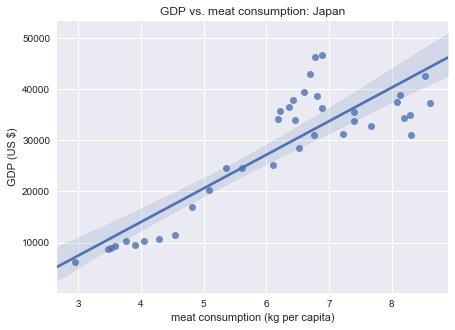

In [17]:
# Initialize figure
fig = plt.figure(figsize=(7,5))

# Initialize subplot 1
ax = fig.add_subplot(111)

# Plot
sns.regplot(japan_meat, japan_gdp)

ax.set_ylabel('GDP (US $)')
ax.set_xlabel('meat consumption (kg per capita)')
ax.set_title('GDP vs. meat consumption: Japan')

plt.show()

<h6>(c) Correlation coefficients: USA and Argentina</h6>

In [18]:
argentina = pd.read_csv("Argentina_GDP_Meat.csv")
usa = pd.read_csv("USA_GDP_Meat.csv")

arg_gdp = argentina["per capita GDP (2015 US$)"]
arg_meat = argentina["meat consumption (kg per capita)"]

usa_gdp = usa["per capita GDP (2015 US$)"]
usa_meat = usa["meat consumption (kg per capita)"]

# Correlation coefficient
arg_corr = np.corrcoef(arg_gdp, arg_meat)
usa_corr = np.corrcoef(usa_gdp, usa_meat)

print("Correlation coefficient of Argentina GDP vs meat consumption:\n") 
print(arg_corr)

print("\nCorrelation coefficient of USA GDP vs meat consumption:\n") 
print(usa_corr)

Correlation coefficient of Argentina GDP vs meat consumption:

[[ 1.         -0.68366985]
 [-0.68366985  1.        ]]

Correlation coefficient of USA GDP vs meat consumption:

[[ 1.         -0.88057332]
 [-0.88057332  1.        ]]


USA has a strong negative correlation of GDP with meat consumption while Argentina has a weak negative correlation. 

<b>(d) Based on the three countries,</b> there is no robust correlation between GDP and meat consumption since each country has a different and contrasting correlation.